In [1]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np

/vol/bitbucket/fms119/miniconda3/envs/modern_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
# Load the CIFAR10 dataset
(train_dataset, test_dataset), dataset_info = tfds.load('cifar10', split=['train', 'test'], shuffle_files=True, with_info=True)

# Shuffle the dataset
shuffled_train_dataset = train_dataset.shuffle(2048)

# Take the first n instances from the shuffled dataset
sampled_train_dataset = shuffled_train_dataset.take(50000)

# Create an empty list to store the images
images = []

# Iterate over the dataset
for example in sampled_train_dataset.as_numpy_iterator():
    # Get the image from the example and append it to the list
    images.append(example['image'])

# Convert the list of images to a numpy array
images = np.array(images)

# Save the array
np.savez(f'/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/cirfar10_true_50000.npz', images=images)

2023-07-26 19:21:06.520937: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-07-26 19:21:07.100161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [1]
	 [[{{node Placeholder/_2}}]]
2023-07-26 19:21:07.101537: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [1]
	 [[{{node Placeholder/_1}}]]


In [27]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np

sizes = [500,  2000,  4000,  6000,  8000, 10001, 15000,  1000, 12500, 20000]

from zijing_main import *

def get_fid(n):
    data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/'
                           'samples/cirfar10_true_10000.npz')
    data_samples = data['images'].transpose(0,3,1,2)
    data_samples = np.interp(data_samples, (data_samples.min(), data_samples.max()), (0, 1))

    file_path = '/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/cirfar10_true_50000.npz'
    data = np.load(file_path)
    # if images.shape[1]==3:
    #     images = images.transpose(0,2,3,1)
    # print(data['images'].shape)
    gen_samples = data['images'][:n]
    gen_samples = np.interp(gen_samples, (gen_samples.min(), gen_samples.max()), (0, 1))

    fid = compute_fid_nchw(data_samples, gen_samples)
    return fid

# fid_trails = np.zeros((len(sizes),5))

# for i, n in enumerate(sizes):
#     for j, trial in enumerate(['a', 'b', 'c', 'd', 'e']):
#         print(f'{i} out of {len(sizes)}')
#         file_path = f'/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/cirfar10_true_{n}{trial}.npz'
#         fid = get_fid(file_path)
#         print(fid)
#         fid_trails[i, j] = fid

# np.savez('/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/trial_fids.npz', fid_trails=fid_trails)

(500, 3, 32, 32)
(10000, 3, 32, 32)
(10000, 3, 32, 32)
(10000, 32, 32, 3)
1.0
0.0


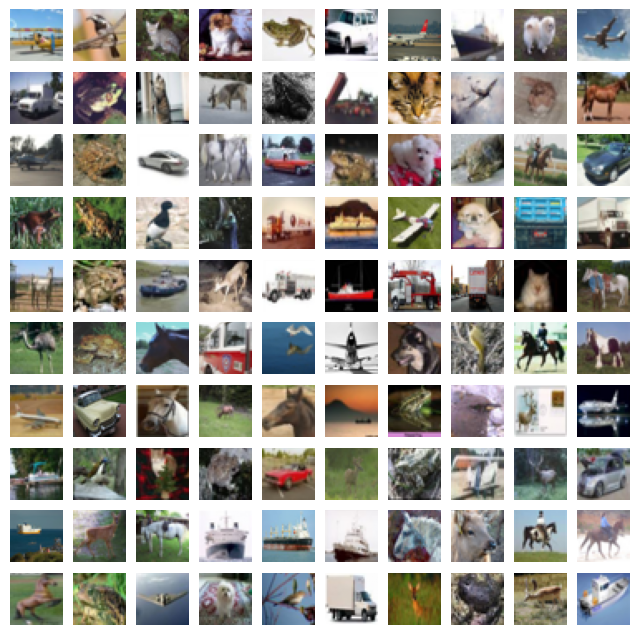

In [38]:
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/'
                        'samples/cirfar10_true_10000.npz')
data_samples = data['images'].transpose(0,3,1,2)
data_samples = np.interp(data_samples, (data_samples.min(), data_samples.max()), (0, 1))

file_path = '/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/cirfar10_true_50000.npz'
data = np.load(file_path)
gen_samples = data['images'][:n].transpose(0,3,1,2)
print(gen_samples.shape)
print(data_samples.shape)

gen_samples = np.interp(gen_samples, (gen_samples.min(), gen_samples.max()), (0, 1))

images = data_samples

print(images.shape)

# Number of rows/columns in the grid
grid_size = 10

# Create a new figure
plt.figure(figsize=(8,8))

if images.shape[1]==3:
    images = images.transpose(0,2,3,1)

print(images.shape)
print(images.max())
print(images.min())

# Loop over the images
for i in range(grid_size * grid_size):
    # Create a subplot for each image
    plt.subplot(grid_size, grid_size, i+1)
    # Display the image
    random_image = np.random.randint(0, images.shape[0])
    plt.imshow(images[i])
    # Remove the axes
    plt.axis('off')

# Show the figure
plt.show()

In [ ]:
fid_trails = np.zeros((len(sizes),5))

for i, n in enumerate(sizes):
    for j, trial in enumerate(['a', 'b', 'c', 'd', 'e']):
        print(f'{i} out of {len(sizes)}')
        file_path = f'/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/cirfar10_true_{n}{trial}.npz'
        fid = get_fid(file_path)
        print(fid)
        fid_trails[i, j] = fid

In [8]:
sizes = [500,  2000,  4000,  6000,  8000, 10001, 15000,  1000, 12500, 20000]

fid_trails_data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/trial_fids.npz')
fid_trails = fid_trails_data['fid_trails']

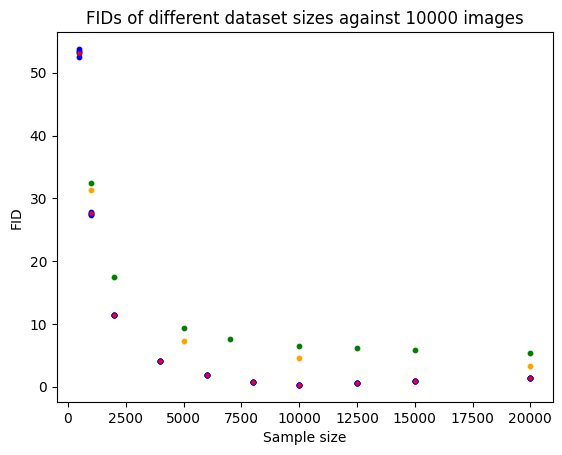

In [16]:
plt.scatter(sizes*5, fid_trails[:].T.reshape(-1), s=10, c='b')
plt.scatter(sizes, fid_trails.mean(axis=1), s=5, c='r')
plt.scatter(
    [10000, 1000, 5000, 7000, 2000, 20000, 15000, 12500], 
    [6.53987, 32.508, 9.37150, 7.5986, 17.4984, 5.33, 5.763, 6.07865], 
    s=10, c='g')
plt.scatter(
    [10000, 1000, 5000, 20000], 
    [4.497873, 31.2974, 7.24602, 3.2656], 
    s=10, c='orange')
# plt.yscale('log')
plt.title('FIDs of different dataset sizes against 10000 images')
plt.ylabel('FID')
plt.xlabel('Sample size')
plt.show()

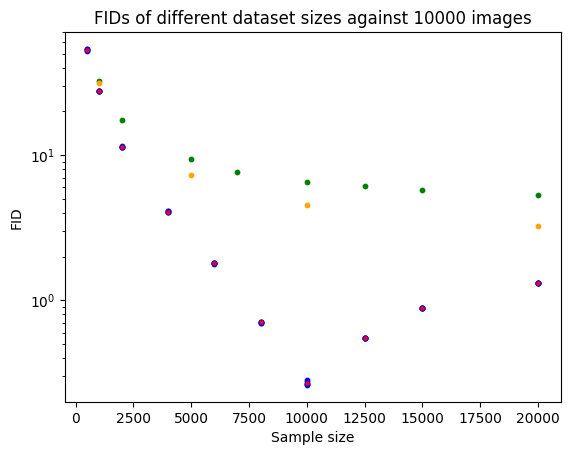

In [15]:
plt.scatter(sizes*5, fid_trails[:].T.reshape(-1), s=10, c='b')
plt.scatter(sizes, fid_trails.mean(axis=1), s=5, c='r')
plt.scatter(
    [10000, 1000, 5000, 7000, 2000, 20000, 15000, 12500], 
    [6.53987, 32.508, 9.37150, 7.5986, 17.4984, 5.33, 5.763, 6.07865], 
    s=10, c='g')
plt.scatter(
    [10000, 1000, 5000, 20000], 
    [4.497873, 31.2974, 7.24602, 3.2656], 
    s=10, c='orange')
plt.yscale('log')
plt.title('FIDs of different dataset sizes against 10000 images')
plt.ylabel('FID')
plt.xlabel('Sample size')
plt.show()

Would be interesting to show that the FID is biased and this is why we see it increasing after 10 000 samples.

Took 35 minutes to run FID calculation for 20 000 images.


In [13]:
file_path = f'/vol/bitbucket/fms119/score_sde_pytorch/samples/synthetic_all_samples_20000.npz'
fid = get_fid(file_path)
print(fid)

(20000, 3, 32, 32)
TAKING SHORTCUT
3.2656656712132417


In [4]:
file_path = f'/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_5000.npz'
fid = get_fid(file_path)
print(fid)

(5000, 3, 32, 32)
TAKING SHORTCUT
7.24602269966374


In [5]:
file_path = f'/vol/bitbucket/fms119/score_sde_pytorch/samples/synthetic_all_samples_10001.npz'
fid = get_fid(file_path)
print(fid)

(10001, 3, 32, 32)


TAKING SHORTCUT
4.497873623441592


In [6]:
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_5000.npz')
images_a = data['images']
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_5000_a.npz')
images_b = data['images']
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_10000_a.npz')
images_c = data['images']

In [18]:
augmented_generation = np.concatenate((images_a, images_b, images_c))[:12500]
np.savez(f'/vol/bitbucket/fms119/score_sde_pytorch/samples/synthetic_all_samples_12500.npz', images=augmented_generation)

In [10]:
augmented_generation.shape

(20000, 3, 32, 32)

In [19]:
import numpy as np
path = '/vol/bitbucket/fms119/score_sde_pytorch/assets/stats/cifar10_stats.npz'
ys_data = np.load(path)

In [20]:
ys_data.files

['logits', 'pool_3']

In [ ]:
ys_data['logits'].mean(axis=0)
np.cov(ys_data['logits'], rowvar=False)

In [23]:
from zijing_fid_compute import calculate_frechet_distance

In [24]:
mu = ys_data['pool_3'].mean(axis=0)
cov = np.cov(ys_data['pool_3'], rowvar=False)

In [25]:
path = '/vol/bitbucket/fms119/score_sde_pytorch/assets/stats/CIFAR10_stats_10000.npz'
data = np.load(path)
my_mu = data['mu']
my_sigma = data['sigma']

calculate_frechet_distance(mu, cov, my_mu, my_sigma)

2.4973502877245437